In [19]:
!pip install folium

In [35]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 8.5 MB/s eta 0:00:00


In [85]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.0/277.0 kB 20.7 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


In [86]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import osmnx as ox
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp

In [2]:
df = pd.read_excel('/content/Omdena_Repzone_v1 - Copy.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   VisitDuration                 2654 non-null   object
 1   VisitFreq                     2654 non-null   int64 
 2   MustVisitDays                 4 non-null      object
 3   EligibilityBeginTime (hh:mm)  2654 non-null   object
 4   EligibilityEndTime (hh:mm)    2654 non-null   object
 5   Country                       2654 non-null   object
 6   City                          2654 non-null   object
 7   District                      2654 non-null   object
 8   AddressText                   2654 non-null   object
 9   Latitude                      2590 non-null   object
 10  Longitude                     2590 non-null   object
dtypes: int64(1), object(10)
memory usage: 228.2+ KB


In [4]:
df = df[['Country', 'City', 'District', 'Latitude', 'Longitude']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    2654 non-null   object
 1   City       2654 non-null   object
 2   District   2654 non-null   object
 3   Latitude   2590 non-null   object
 4   Longitude  2590 non-null   object
dtypes: object(5)
memory usage: 103.8+ KB


In [6]:
df.dropna()

,Country,City,District,Latitude,Longitude
0,Turkey,ERZURUM,YAKUTIYE,"39,913934","41,270719"
1,Turkey,ADANA,YÜREĞIR,"36,980521","35,367678"
2,Turkey,Karabük,Safranbolu,"41,233278","32,66107"
3,Turkey,MANISA,YUNUSEMRE,"38,6146272369206","27,3817652422926"
4,Turkey,İZMIR,KONAK,"38,333603","27,133406"
...,...,...,...,...,...
2643,Turkey,Sakarya,Merkez,"40,80236769","30,36705986"
2646,Turkey,İSTANBUL,ÜMRANIYE,"40,9992237254883","29,1301159188151"
2647,Turkey,KOCAELI,DARICA,"40,7710706459764","29,4012617692351"
2651,Turkey,Karabük,Karabük Merkez,"41,2183549114757","32,6641906014523"


In [7]:
# create subset as per city and dist according to user input
print(df.City.value_counts())

# Get user input for city and district
city_input = input("Enter the city: ")
if city_input in df['City'].values:
  print("City is valid, selected city is : >>>>" , city_input)
else:
  print("City is invalid")

df2 = df[(df['City'] == city_input)]


City
İstanbul    641
Antalya     128
İzmir       108
Ankara       93
Kocaeli      85
           ... 
ÇANKIRI       1
KÜTAHYA       1
Çankırı       1
İSTANBUL      1
KOCAELI       1
Name: count, Length: 114, dtype: int64
Enter the city: İstanbul
City is valid, selected city is : >>>> İstanbul


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 641 entries, 84 to 2650
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    641 non-null    object
 1   City       641 non-null    object
 2   District   641 non-null    object
 3   Latitude   628 non-null    object
 4   Longitude  628 non-null    object
dtypes: object(5)
memory usage: 30.0+ KB


In [9]:
df2.District.value_counts()

,count
District,
Şişli,39
Esenyurt,39
Sarıyer,38
Küçükçekmece,33
Gaziosmanpaşa,29
Kadıköy,29
Beylikdüzü,27
Başakşehir,27
Bağcılar,26


In [10]:
print(df2.District.value_counts())

District_input = input("Enter the District: ")

if District_input in df2['District'].values:
  print("City is valid, selected city is : >>>>" , city_input)
else:
  print("City is invalid")

df_output = df2[(df2['District'] == District_input)]

District
Şişli            39
Esenyurt         39
Sarıyer          38
Küçükçekmece     33
Gaziosmanpaşa    29
Kadıköy          29
Beylikdüzü       27
Başakşehir       27
Bağcılar         26
Pendik           24
Kağıthane        21
Ataşehir         20
Beşiktaş         20
Ümraniye         20
Fatih            18
Bakırköy         17
Sancaktepe       15
Büyükçekmece     15
Eyüp             14
Maltepe          14
Avcılar          14
Kartal           14
Bahçelievler     14
Tuzla            13
Çekmeköy         11
Güngören          9
Bayrampaşa        9
Beyoğlu           8
Zeytinburnu       8
Üsküdar           8
Beykoz            7
Sultangazi        6
Arnavutköy        5
Esenler           5
Sultanbeyli       4
Çatalca           4
Silivri           4
Merkez            4
Eyüpsultan        3
Kadıkoy           2
Şile              1
Kagithane         1
Kadiköy           1
Sisli             1
Name: count, dtype: int64
Enter the District: Şişli
City is valid, selected city is : >>>> İstanbul


In [11]:
df_output.reset_index(drop=True)

,Country,City,District,Latitude,Longitude
0,Turkey,İstanbul,Şişli,"41,062125","28,989281"
1,Turkey,İstanbul,Şişli,"41,064196","28,977431"
2,Turkey,İstanbul,Şişli,"41,0142288208008","28,8570652008057"
3,Turkey,İstanbul,Şişli,"41,071249","28,991452"
4,Turkey,İstanbul,Şişli,"41,071274","28,998944"
5,Turkey,İstanbul,Şişli,"41,049016","28,959666"
6,Turkey,İstanbul,Şişli,"41,057094","28,981169"
7,Turkey,İstanbul,Şişli,"41,044194","28,959475"
8,Turkey,İstanbul,Şişli,"41,0491714477539","28,9917144775391"
9,Turkey,İstanbul,Şişli,"41,051377127421","28,992944631953"


In [12]:
# Preprocess the coordinates
df_output["Latitude"] = df_output["Latitude"].str.replace(',', '.', regex=False)
df_output["Longitude"] = df_output["Longitude"].str.replace(',', '.', regex=False)
df_output[["Latitude", "Longitude"]] = df_output[["Latitude", "Longitude"]].astype(float)

<ipython-input-12-f0d8d78bb524>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output["Latitude"] = df_output["Latitude"].str.replace(',', '.', regex=False)
<ipython-input-12-f0d8d78bb524>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output["Longitude"] = df_output["Longitude"].str.replace(',', '.', regex=False)
<ipython-input-12-f0d8d78bb524>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [13]:
df_output.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 223 to 2641
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    39 non-null     object 
 1   City       39 non-null     object 
 2   District   39 non-null     object 
 3   Latitude   39 non-null     float64
 4   Longitude  39 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1.8+ KB


In [14]:
df_output = df_output.reset_index().rename(columns={"index": "id", "Latitude": "y", "Longitude": "x"})
df_output.head()

,id,Country,City,District,y,x
0,223,Turkey,İstanbul,Şişli,41.062125,28.989281
1,856,Turkey,İstanbul,Şişli,41.064196,28.977431
2,912,Turkey,İstanbul,Şişli,41.014229,28.857065
3,917,Turkey,İstanbul,Şişli,41.071249,28.991452
4,959,Turkey,İstanbul,Şişli,41.071274,28.998944


In [27]:
data = df_output.copy()
data["color"] = ''
data.loc[data.index[0], 'color'] = 'red'  # Starting point
data.loc[data.index[1:], 'color'] = 'black'  # Other points

In [30]:
start = list([data.iloc[0]['y'], data.iloc[0]['x']])

In [31]:
start

[np.float64(41.062125), np.float64(28.989281)]

In [17]:
data.head()

,id,Country,City,District,y,x,color
0,223,Turkey,İstanbul,Şişli,41.062125,28.989281,red
1,856,Turkey,İstanbul,Şişli,41.064196,28.977431,black
2,912,Turkey,İstanbul,Şişli,41.014229,28.857065,black
3,917,Turkey,İstanbul,Şişli,41.071249,28.991452,black
4,959,Turkey,İstanbul,Şişli,41.071274,28.998944,black


In [32]:
map = folium.Map(location=start, tiles= "cartodbpositron", zoom_start=12)
data.apply(lambda row:
    folium.CircleMarker(
        location=[row["y"], row["x"]],
        color=row["color"], fill = True, radius=5).add_to(map), axis=1)

map

In [37]:
    # Download road network from OpenStreetMap

    graph = ox.graph_from_point(start, dist=10000, network_type="drive")
    graph = ox.add_edge_speeds(graph)
    graph = ox.add_edge_travel_times(graph)

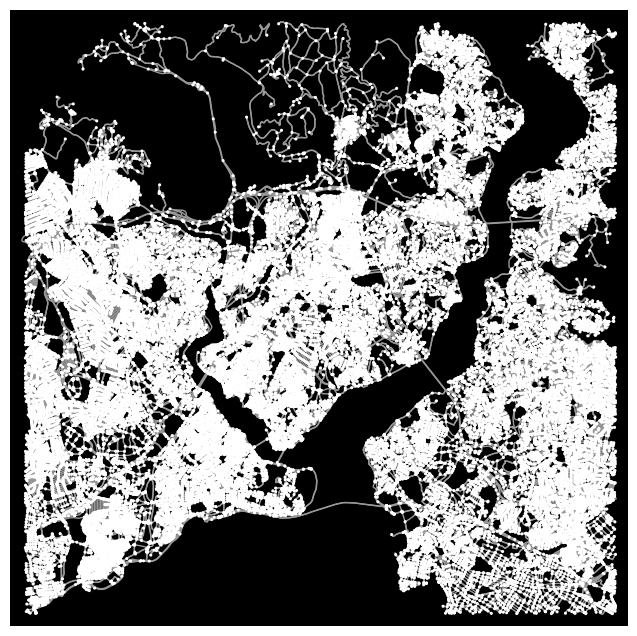

In [39]:
fig,ax = ox.plot_graph(graph, bgcolor="black", node_size=5 , node_color="white", figsize=(16,8))

In [72]:
  # Map locations to nearest nodes in the graph
  start_node=ox.distance.nearest_nodes(graph, start[1], start[0])
  df_output["node"] = df_output[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(graph, x[1], x[0]), axis=1)
  df_output = df_output.drop_duplicates("node", keep='first')

<ipython-input-72-d69b28fb3ae7>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_output["node"] = df_output[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(graph, x[1], x[0]), axis=1)
<ipython-input-72-d69b28fb3ae7>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_output["node"] = df_output[["y", "x"]].apply(lambda x: ox.distance.nearest_nodes(graph, x[1], x[0]), axis=1)
<ipython-input-72-d69b28fb3ae7>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by p

In [73]:
df_output.head()

,id,Country,City,District,y,x,node
0,223,Turkey,İstanbul,Şişli,41.062125,28.989281,251149577
1,856,Turkey,İstanbul,Şişli,41.064196,28.977431,1366488799
2,912,Turkey,İstanbul,Şişli,41.014229,28.857065,919142905
3,917,Turkey,İstanbul,Şişli,41.071249,28.991452,370765752
4,959,Turkey,İstanbul,Şişli,41.071274,28.998944,370765368


In [74]:
df_null = df_output[df_output['node'] == 2380874190]

In [76]:
df_null

,id,Country,City,District,y,x,node


In [77]:
df_output.drop(df_output[df_output['node'] == 2380874190].index, inplace = True)

In [78]:
def calculate_travel_time(a , b):
    try:
        d=nx.shortest_path_length(graph, source=a, target=b, method='dijkstra', weight='travel_time')
    except:
        d=np.nan
    return d

distance_matrix=np.asarray([[calculate_travel_time(a,b)for b in df_output["node"].tolist()] for a in df_output["node"].tolist()])
distance_matrix=pd.DataFrame(distance_matrix, columns=df_output["node"].values, index=df_output["node"].values)

distance_matrix.head()

,251149577,1366488799,919142905,370765752,370765368,1227274445,11184082446,1227273967,2382952526,1366449405,...,1366491909,1799971778,2380949599,11181111936,311852900,1892105740,1678949019,311853215,781489590,2380874205
251149577,0.000000,209.056860,948.944203,175.909768,221.612814,421.951749,172.006957,461.912317,255.011445,205.431678,...,216.784465,163.206697,71.676258,291.812231,251.919587,104.350424,360.127486,184.569858,268.678318,233.508725
1366488799,167.272493,0.000000,983.561350,206.738645,297.062149,303.507375,111.955583,343.467944,296.078895,246.499128,...,254.871756,103.155323,131.617624,158.095287,238.906607,237.568567,425.874603,151.198226,296.288528,308.958060
919142905,997.420840,938.317432,0.000000,944.623699,989.650410,783.122148,1025.257760,830.301000,1121.891008,1067.760824,...,1112.342609,1016.457500,933.861695,841.234711,1074.869724,890.596418,1128.165083,1045.896028,934.683942,1001.546321
370765752,194.534882,243.221197,923.089987,0.000000,108.569910,403.547904,245.909752,445.564461,347.683632,298.103865,...,309.456652,237.109492,124.350583,296.171648,340.451984,171.574103,237.382363,271.281959,164.897323,120.465820
370765368,253.438545,325.785937,939.147280,103.893276,0.000000,419.605197,323.582807,466.230044,335.798891,298.298614,...,368.360315,314.782547,206.915323,327.729272,403.495437,121.134209,149.174822,336.145707,225.520274,31.873620


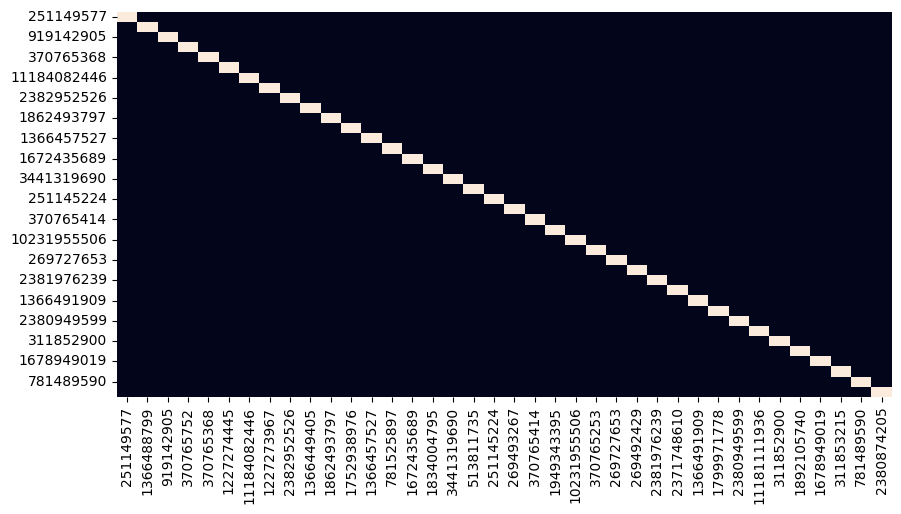

In [79]:
heatmap= distance_matrix.copy()
for col in heatmap.columns:
    heatmap[col]=heatmap[col].apply(lambda x:
         0.3 if pd.isnull(x) else
         (0.7 if np.isinf(x) else
          (0 if x!=0 else 1)) )

fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(heatmap, vmin=0 , vmax=1 , cbar=False, ax=ax)
plt.show()

In [80]:
distance_matrix= distance_matrix.round()
distance_matrix=distance_matrix.astype('int')
distance_matrix

,251149577,1366488799,919142905,370765752,370765368,1227274445,11184082446,1227273967,2382952526,1366449405,...,1366491909,1799971778,2380949599,11181111936,311852900,1892105740,1678949019,311853215,781489590,2380874205
251149577,0,209,949,176,222,422,172,462,255,205,...,217,163,72,292,252,104,360,185,269,234
1366488799,167,0,984,207,297,304,112,343,296,246,...,255,103,132,158,239,238,426,151,296,309
919142905,997,938,0,945,990,783,1025,830,1122,1068,...,1112,1016,934,841,1075,891,1128,1046,935,1002
370765752,195,243,923,0,109,404,246,446,348,298,...,309,237,124,296,340,172,237,271,165,120
370765368,253,326,939,104,0,420,324,466,336,298,...,368,315,207,328,403,121,149,336,226,32
1227274445,492,339,864,439,484,0,401,76,528,491,...,392,409,429,242,343,385,623,389,429,496
11184082446,168,115,1010,233,324,379,0,398,213,164,...,144,20,146,233,128,264,453,40,323,336
1227273967,473,389,916,504,550,65,372,0,499,462,...,363,380,437,307,314,450,688,360,475,561
2382952526,227,321,1174,401,441,536,226,482,0,105,...,165,217,299,437,243,270,582,190,496,408
1366449405,155,254,1083,311,351,518,159,521,58,0,...,144,151,227,370,196,180,491,143,424,317


In [83]:
drivers = 1
lst_nodes= df_output["node"].tolist()
print("start:", start_node, "total locations to visit", len(lst_nodes)-1, "drivers", drivers)

start: 251149577 total locations to visit 37 drivers 1


In [87]:
distance_matrix = distance_matrix.values.tolist()

In [89]:
num_vehicles = eval(input("Enter the number of vehicles: "))

def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data["distance_matrix"] = distance_matrix
    data["num_vehicles"] = num_vehicles
    data["depot"] = 0
    return data

Enter the number of vehicles: 4


In [90]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f"Objective: {solution.ObjectiveValue()}")
    max_route_distance = 0
    for vehicle_id in range(data["num_vehicles"]):
        if not routing.IsVehicleUsed(solution, vehicle_id):
            continue
        index = routing.Start(vehicle_id)
        plan_output = f"Route for vehicle {vehicle_id}:\n"
        route_distance = 0
        while not routing.IsEnd(index):
            plan_output += f" {manager.IndexToNode(index)} -> "
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            route_distance += routing.GetArcCostForVehicle(
                previous_index, index, vehicle_id
            )
        plan_output += f"{manager.IndexToNode(index)}\n"
        plan_output += f"Distance of the route: {route_distance}m\n"
        print(plan_output)
        max_route_distance = max(route_distance, max_route_distance)
    print(f"Maximum of the route distances: {max_route_distance}m")



def main():
    """Entry point of the program."""
    # Instantiate the data problem.
    data = create_data_model()

    # Create the routing index manager.
    manager = pywrapcp.RoutingIndexManager(
        len(data["distance_matrix"]), data["num_vehicles"], data["depot"]
    )

    # Create Routing Model.
    routing = pywrapcp.RoutingModel(manager)

    # Create and register a transit callback.
    def distance_callback(from_index, to_index):
        """Returns the distance between the two nodes."""
        # Convert from routing variable Index to distance matrix NodeIndex.
        from_node = manager.IndexToNode(from_index)
        to_node = manager.IndexToNode(to_index)
        return data["distance_matrix"][from_node][to_node]

    transit_callback_index = routing.RegisterTransitCallback(distance_callback)

    # Define cost of each arc.
    routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)

    # Add Distance constraint.
    dimension_name = "Distance"
    routing.AddDimension(
        transit_callback_index,
        0,  # no slack
        3000,  # vehicle maximum travel distance
        True,  # start cumul to zero
        dimension_name,
    )
    distance_dimension = routing.GetDimensionOrDie(dimension_name)
    distance_dimension.SetGlobalSpanCostCoefficient(100)

    # Setting first solution heuristic.
    search_parameters = pywrapcp.DefaultRoutingSearchParameters()
    search_parameters.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )

    # Solve the problem.
    solution = routing.SolveWithParameters(search_parameters)

    # Print solution on console.
    if solution:
        print_solution(data, manager, routing, solution)
    else:
        print("No solution found !")


if __name__ == "__main__":
    main()

Objective: 201128
Route for vehicle 0:
 0 ->  12 ->  25 ->  9 ->  24 ->  19 ->  8 ->  17 ->  18 ->  28 ->  32 ->  7 ->  5 ->  27 ->  35 ->  10 ->  6 ->  29 ->  13 -> 0
Distance of the route: 1738m

Route for vehicle 1:
 0 ->  2 -> 0
Distance of the route: 1946m

Route for vehicle 2:
 0 ->  15 ->  33 ->  23 ->  26 ->  37 ->  4 ->  34 ->  14 ->  20 ->  21 ->  30 ->  22 -> 0
Distance of the route: 1088m

Route for vehicle 3:
 0 ->  11 ->  3 ->  16 ->  36 ->  31 ->  1 -> 0
Distance of the route: 1756m

Maximum of the route distances: 1946m
